<a href="https://colab.research.google.com/github/antahiap/dsr-image-dataset-curation/blob/main/mean_average_precision_and_precision_and_recall_curve_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Steps to calculate the average precision (AP) of a classification or detection model

  *  Generate the prediction scores using the model
  *  Convert the prediction scores to **binary** class labels (positive or negative)
  *  Compute the confusion matrix (identify predictions as true positives, true negatives, false positives, and false negatives)
  * Calculate the precision and recall metrics at different prediction score thresholds
  * Measure the average precision

  >>The average precision (AP) is a way to summarize the precision-recall curve into a single value representing the average of all precisions. The AP is calculated according to the next equation. Using a loop that goes through all precisions/recalls, the difference between the current and next recalls is calculated and then multiplied by the current precision. In other words, the AP is the weighted sum of precisions at each threshold where the weight is the increase in recall.

$$ AP = \sum_{k=0}^{k=n-1}(Recalls(k) - Recalls(k-1)) * Precisions(k)$$

$$n = \text{number of thresholds}$$
________

The list of precisions in the last position (position $n$) is always 1 (we append this value)

$$\text{Precisions(n) = 1}$$


The list of recalls in the last position (position $n$) is always 0 (we append this value)

$$\text{Recalls(n)=0}$$





In [ ]:
import numpy as np
new_values = list(np.random.uniform(0, 1,1000))
new_labels = ['positive', 'negative'] * 500

In [ ]:
import numpy

y_true = ["positive", "negative", "negative", "positive", "positive", "positive", "negative",
          "positive", "negative", "positive", "positive", "positive", "positive", "negative",
          "negative", "negative"]

y_true = y_true + new_labels


# suppose that this are the confidences of different models
# exercise: change number of data points by generating random numbers between 0 and 1
# we are gonna append the same number of items in the y_true vector of ground truths

pred_scores = [0.7, 0.3, 0.5, 0.6, 0.55, 0.9, 0.4, 0.2, 0.4, 0.3, 0.7, 0.5, 0.8, 0.2, 0.3, 0.35]
pred_scores = pred_scores + new_values

# the start and end range and the step size are up to us
thresholds = numpy.arange(start=0.1, stop=0.99, step=0.05)

# 10 threshold values of confidence exist within this range
thresholds

array([0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55, 0.6 ,
       0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95])

In [ ]:
import sklearn.metrics

# we get a list of as many precisions and recalls as we have thresholds of confidence
def precision_recall_values(y_true, pred_scores, thresholds):
    precisions = []
    recalls = []

    for threshold in thresholds:
        y_pred = ["positive" if score >= threshold else "negative" for score in pred_scores]

        precision = sklearn.metrics.precision_score(y_true=y_true, y_pred=y_pred, pos_label="positive")
        recall = sklearn.metrics.recall_score(y_true=y_true, y_pred=y_pred, pos_label="positive")

        precisions.append(precision)
        recalls.append(recall)

    return precisions, recalls

In [ ]:
precisions, recalls = precision_recall_values(y_true=y_true,
                                             pred_scores=pred_scores,
                                             thresholds=thresholds)

In [ ]:
precisions, recalls

([0.505945945945946,
  0.5057339449541285,
  0.5079950799507995,
  0.5039370078740157,
  0.5020979020979021,
  0.5044642857142857,
  0.5158730158730159,
  0.5102040816326531,
  0.5065913370998116,
  0.5020576131687243,
  0.5152941176470588,
  0.511049723756906,
  0.49508196721311476,
  0.496,
  0.48058252427184467,
  0.5222929936305732,
  0.49107142857142855,
  0.5084745762711864],
 [0.9194499017681729,
  0.8664047151277013,
  0.8113948919449901,
  0.7544204322200393,
  0.7053045186640472,
  0.6660117878192534,
  0.6385068762278978,
  0.5893909626719057,
  0.5284872298624754,
  0.4793713163064833,
  0.4302554027504912,
  0.36345776031434185,
  0.2966601178781925,
  0.24361493123772102,
  0.1944990176817289,
  0.16110019646365423,
  0.10805500982318271,
  0.05893909626719057])

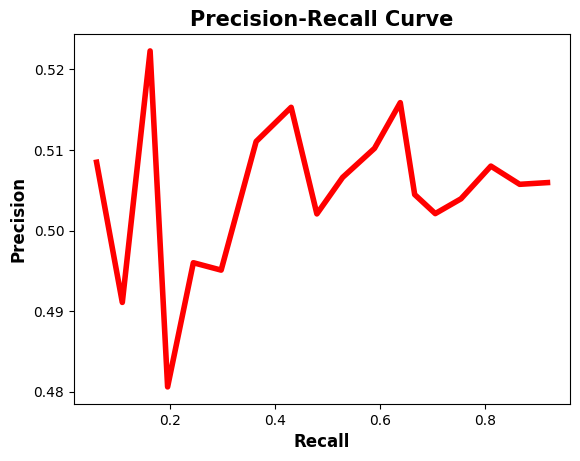

In [ ]:
import matplotlib.pyplot
# note how the behavior of this curve changes as we reevaluate the whole notebook
# It is also different from the behavior of the curve in paperspace's blog, why is this?
matplotlib.pyplot.plot(recalls, precisions, linewidth=4, color="red")
matplotlib.pyplot.xlabel("Recall", fontsize=12, fontweight='bold')
matplotlib.pyplot.ylabel("Precision", fontsize=12, fontweight='bold')
matplotlib.pyplot.title("Precision-Recall Curve", fontsize=15, fontweight="bold")
matplotlib.pyplot.show()

In [ ]:
# the max f1 value will give us the threshold at which we maximize joint recall and precision
f1 = 2 * ((numpy.array(precisions) * numpy.array(recalls)) / (numpy.array(precisions) + numpy.array(recalls)))
f1

array([0.65271967, 0.63866763, 0.62481089, 0.60424862, 0.58660131,
       0.57408975, 0.57067603, 0.54694622, 0.51730769, 0.49045226,
       0.46895075, 0.42479908, 0.37100737, 0.32674572, 0.27692308,
       0.24624625, 0.17713366, 0.1056338 ])

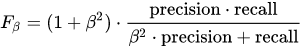

In [ ]:
beta = 0.5
f_05 = (1 + (beta)**2) *  ((numpy.array(precisions) * numpy.array(recalls)) / ((((beta**2) * (numpy.array(precisions))) + numpy.array(recalls))))

beta = 2
f_2 = (1 + (beta)**2) *  ((numpy.array(precisions) * numpy.array(recalls)) / ((((beta**2) * (numpy.array(precisions))) + numpy.array(recalls))))

print(f_05)
print(f_2)

[0.55595153 0.55166375 0.5490561  0.53978071 0.53279905 0.53018455
 0.53648069 0.52429221 0.51082415 0.49735018 0.49569941 0.47266224
 0.43666859 0.41086812 0.37134284 0.36059807 0.28735632 0.20134228]
[0.79027356 0.75825309 0.72481572 0.68620443 0.65249    0.62592319
 0.60952738 0.57164634 0.52395793 0.48374306 0.44494108 0.38573812
 0.32251175 0.2712161  0.22078501 0.1869585  0.12802607 0.07159905]


In [ ]:
np.amin(f_2), np.amin(f1), np.amin(f_05)

(0.07159904534606204, 0.10563380281690142, 0.20134228187919462)

In [ ]:
np.amax(f_2), np.amax(f1), np.amax(f_05)


(0.7902735562310031, 0.6527196652719666, 0.5559515324305062)

In [ ]:
a = np.arange(6).reshape(2,3) + 10
print(a)


print(np.argmax(a))

print(np.argmax(a, axis=0)) # by cols

print(np.argmax(a, axis=1))

[[10 11 12]
 [13 14 15]]
5
[1 1 1]
[2 2]


In [ ]:
np.argmax(f1)

0

In [ ]:
f1[0], np.amax(f1)

(0.6527196652719666, 0.6527196652719666)

In [ ]:
thresholds[np.argmax(f1)]

0.1

In [ ]:
thresholds[np.argmax(f_2)]

0.1

In [ ]:
thresholds[np.argmax(f_05)]

0.1

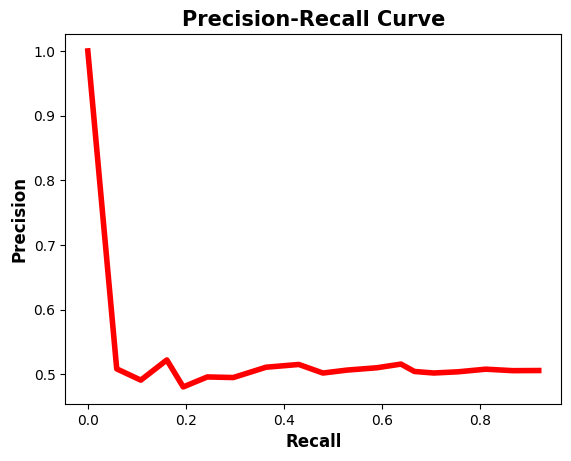

In [ ]:
matplotlib.pyplot.plot(recalls, precisions, linewidth=4, color="red", zorder=0)
# let's find the optimal position of the threshold based on max f1, max f2, and max f05
#matplotlib.pyplot.scatter(#, zorder=1, linewidth=6))

matplotlib.pyplot.xlabel("Recall", fontsize=12, fontweight='bold')
matplotlib.pyplot.ylabel("Precision", fontsize=12, fontweight='bold')
matplotlib.pyplot.title("Precision-Recall Curve", fontsize=15, fontweight="bold")
matplotlib.pyplot.show()

"The average precision (AP) is a way to summarize the precision-recall curve into a single value representing the average of all precisions. The AP is calculated according to the next equation. Using a loop that goes through all precisions/recalls, the difference between the current and next recalls is calculated and then multiplied by the current precision. In other words, the AP is the weighted sum of precisions at each threshold where the weight is the increase in recall."

$$ AP = \sum_{k=0}^{k=n-1}(Recalls(k) - Recalls(k-1)) * Precisions(k)$$

$$n = \text{number of thresholds}$$
________
$$Recalls(n) = 0$$

The list of recalls in the last position (position n) is always 0 (we append this value)

$$\text{Precisions(n) = 1}$$
The list of precisions in the last position (position n) is always 1 (we append this value)   

In [ ]:
# experiment: try reevaluating the notebook while commenting out this value
precisions.append(1)
recalls.append(0)

In [ ]:
import numpy as np

recalls = np.array(recalls)
precisions = np.array(precisions)

AP = np.sum((recalls[:-1] - recalls[1:]) * precisions[:-1])
AP

0.46493309961953994

## References

https://blog.paperspace.com/mean-average-precision/